In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.cluster import KMeans
import glob
from utils import mask_by_range_and_plot

In [6]:
def draw_samples_from_face(mu=15):
    x_s=[]
    y_s=[]
    b=mu
    a=2*b
    for i in range(12000):
        y=np.random.randint(-a,a)
        x=np.random.randint(-b,b)
        if np.divide(np.square(x),np.square(b))+np.divide(np.square(y),np.square(a))<1:
                y_s.append(y)
                x_s.append(x)
                if len(y_s)==25:
                    break
    return  list(map(lambda x: x + 256, x_s)),list(map(lambda x: x +384, y_s))

def get_max_min_centroid_values(img):
    reshaped_img =img.reshape(img.shape[0] * img.shape[1],img.shape[2])
    kmeans=KMeans(n_clusters=4)
    quantized_img_predicted=kmeans.fit_predict(reshaped_img)

    quantized_img = [ kmeans.cluster_centers_[cl] for cl in quantized_img_predicted ]
    quantized_img=np.array(quantized_img).reshape(img.shape[0] , img.shape[1],img.shape[2])
    x,y=draw_samples_from_face(10)
    values,counts=np.unique(quantized_img[y,x],return_counts=True,axis=0)
    centroid_having_max_instances=np.argmax(counts)

    max_centroid=reshaped_img[centroid_having_max_instances==quantized_img_predicted]
    return np.max(max_centroid,axis=0),np.min(max_centroid,axis=0)
    

Max bgr skin range [255 255 255]
Min bgr skin range [0 0 0]
Max hsv skin range [179 255 255]
Min hsv skin range [0 0 4]


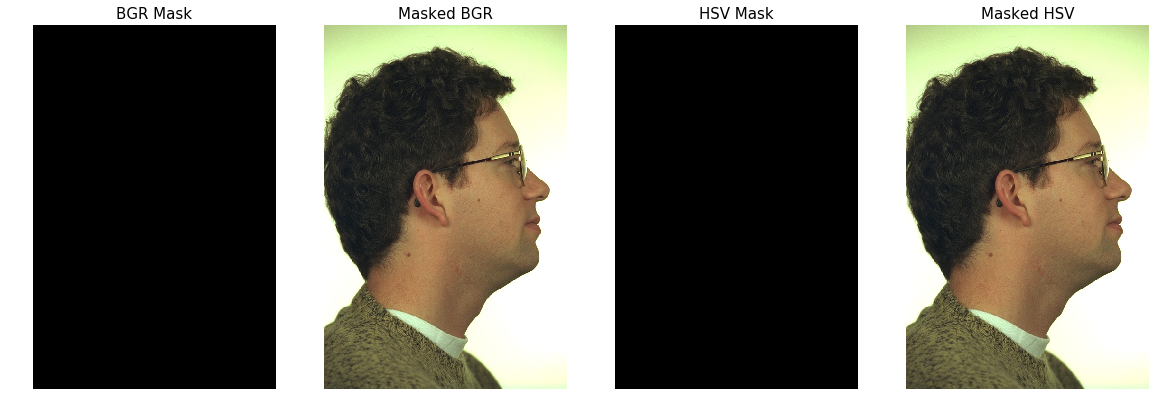

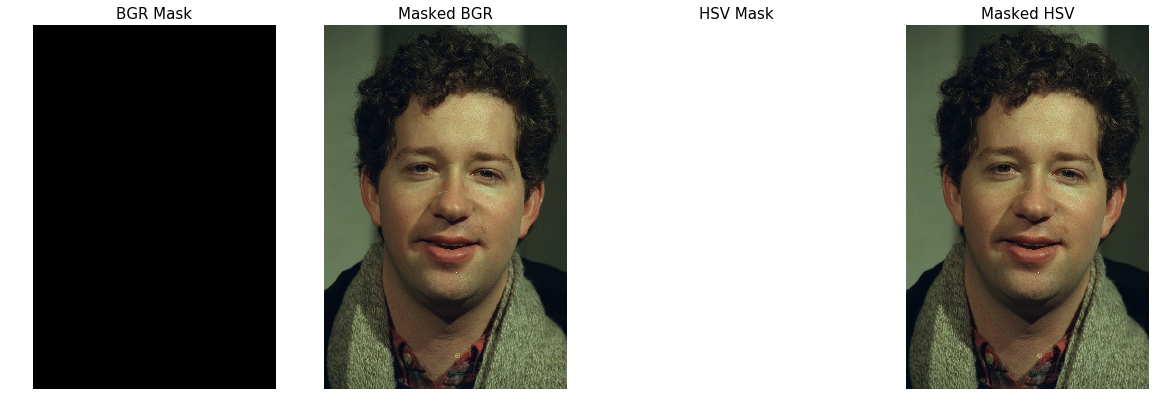

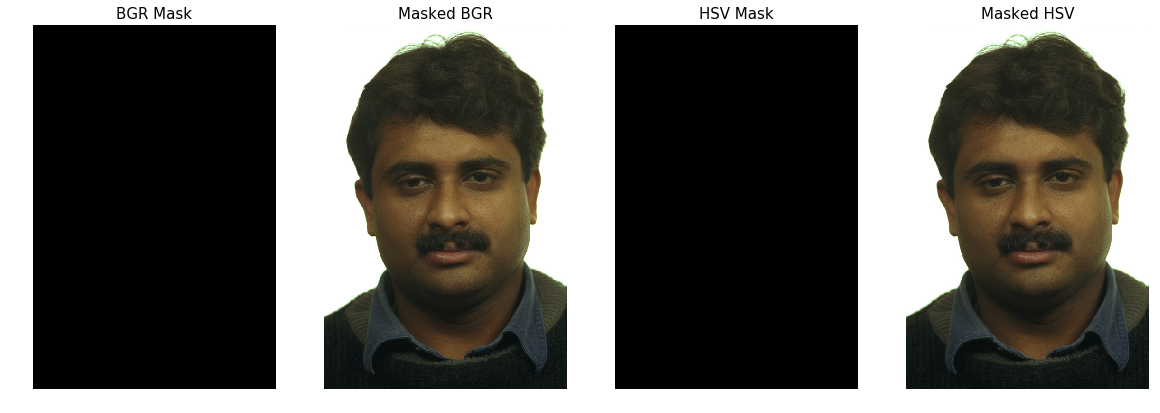

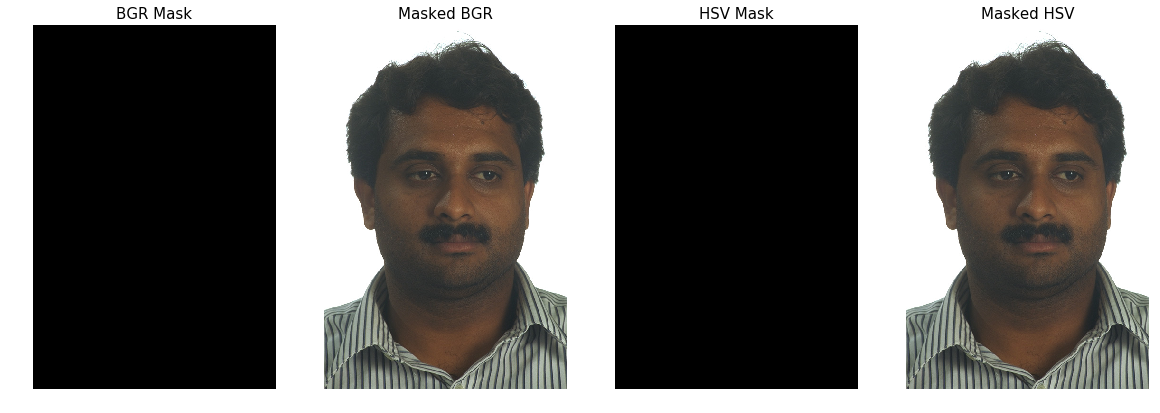

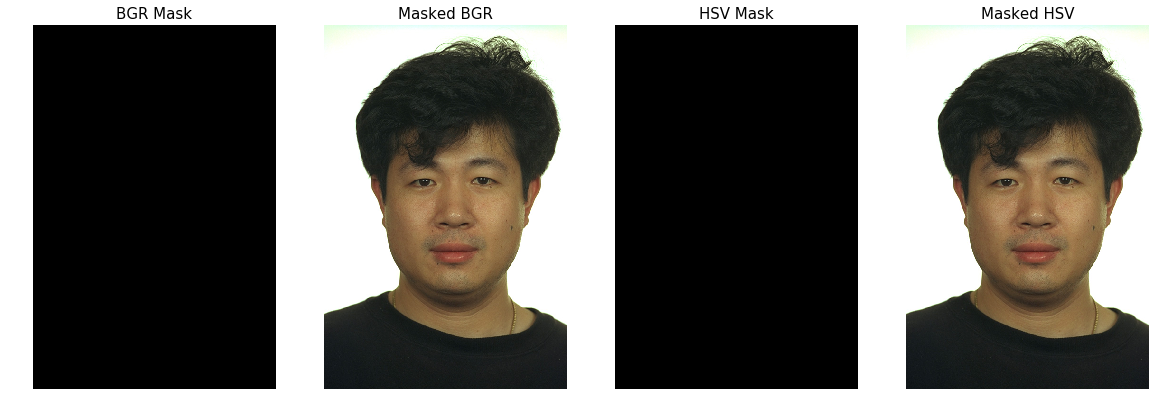

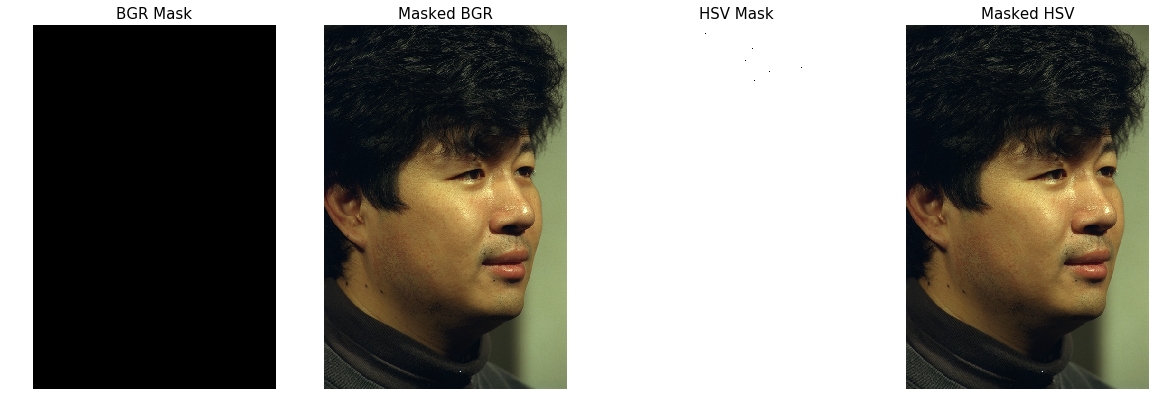

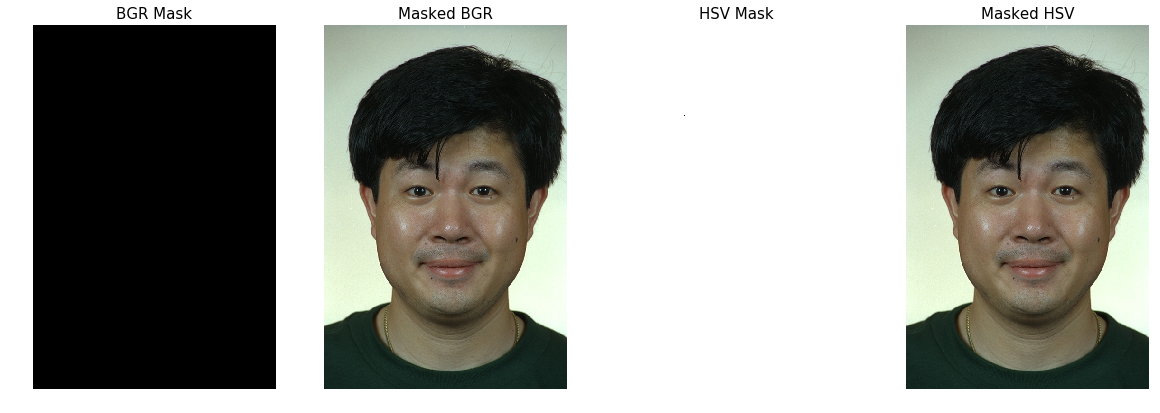

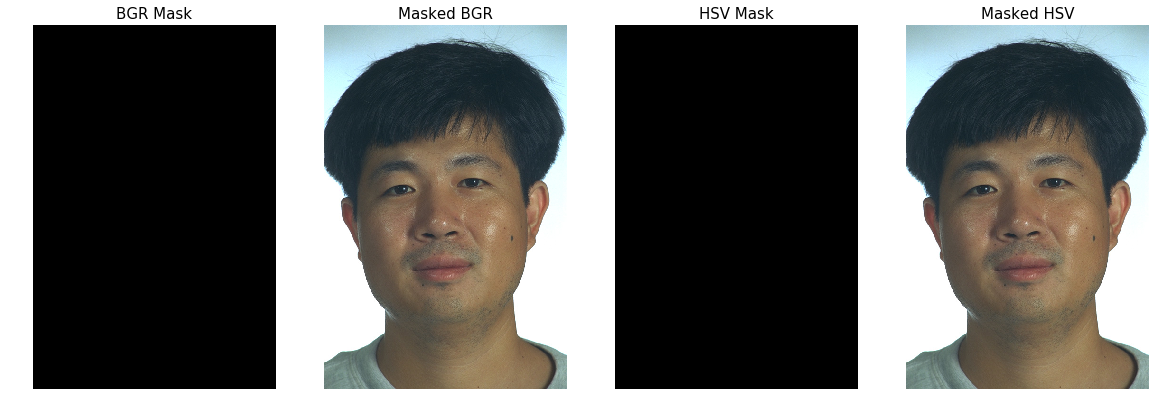

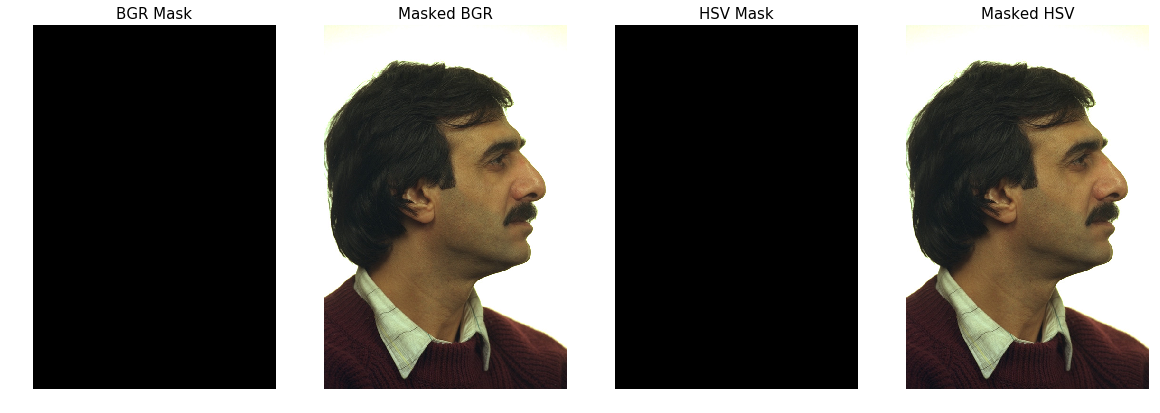

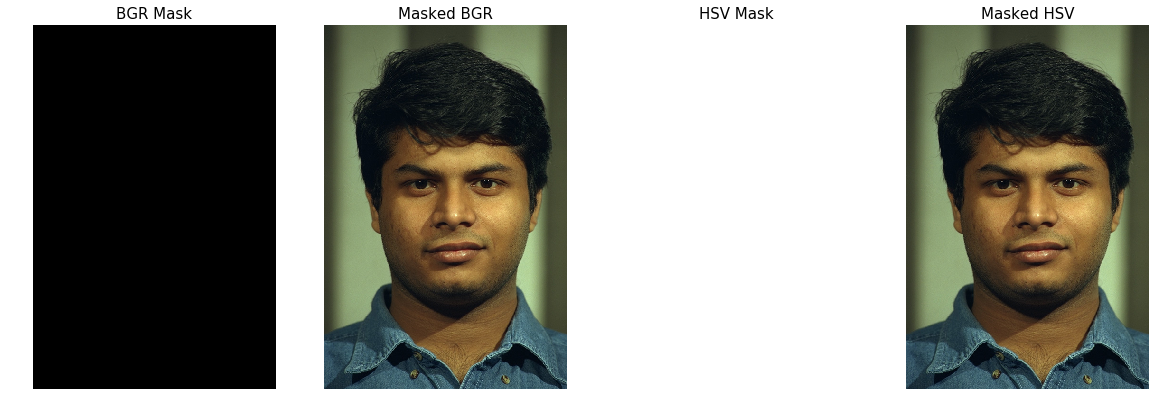

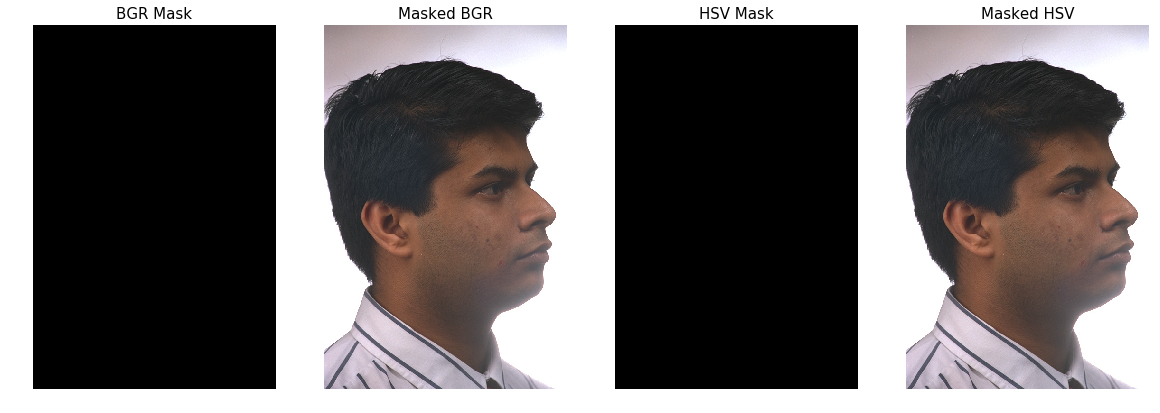

In [7]:
min_ranges_bgr=[]
max_ranges_bgr=[]
min_ranges_hsv=[]
max_ranges_hsv=[]
original_images=glob.glob("Images/Original Images/img_01*.jpg")+glob.glob("Images/Original Images/img_020.jpg")
original_images.sort()
for img_path in original_images:
    bgr_img=cv2.imread(img_path)
    max_rgb,min_rgb=get_max_min_centroid_values(bgr_img)
    max_ranges_bgr.append(max_rgb)
    min_ranges_bgr.append(min_rgb)
    hsv_img=cv2.cvtColor(bgr_img,cv2.COLOR_BGR2HSV)
    max_hsv,min_hsv=get_max_min_centroid_values(hsv_img)
    max_ranges_hsv.append(max_hsv)
    min_ranges_hsv.append(min_hsv)

max_bgr_skin_range=np.max(max_ranges_bgr,axis=0).astype(np.uint8)
min_bgr_skin_range=np.min(min_ranges_bgr,axis=0).astype(np.uint8)
max_hsv_skin_range=np.max(max_ranges_hsv,axis=0).astype(np.uint8)
min_hsv_skin_range=np.min(min_ranges_hsv,axis=0).astype(np.uint8)
    
mask_by_range_and_plot(max_bgr_skin_range,min_bgr_skin_range,max_hsv_skin_range,min_hsv_skin_range)